# Importing Python libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong> TSLA Stock</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# ------------------------------------------------------------------------------------------------------

# Loading dataset

In [2]:
data = yf.Ticker("TSLA")
data = data.history(period='10y')

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [3]:
data.head()

Open   High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                    
2011-07-28  5.520  5.710  5.508  5.634  4693500          0           0.0
2011-07-29  5.560  5.680  5.500  5.634  4741000          0           0.0
2011-08-01  5.734  5.796  5.642  5.754  5824500          0           0.0
2011-08-02  5.738  5.840  5.454  5.468  7747000          0           0.0
2011-08-03  5.500  5.566  5.268  5.440  8972500          0           0.0

### Five last records of data

In [4]:
data.tail()

Open        High         Low       Close    Volume  \
Date                                                                   
2021-07-22  656.440002  662.169983  644.599976  649.260010  15105700   
2021-07-23  646.359985  648.799988  637.299988  643.380005  14581300   
2021-07-26  650.969971  668.200012  647.109985  657.619995  25044100   
2021-07-27  663.400024  666.500000  627.239990  644.780029  32756900   
2021-07-28  646.994995  654.969910  639.400085  645.530029  13031584   

            Dividends  Stock Splits  
Date                                 
2021-07-22          0           0.0  
2021-07-23          0           0.0  
2021-07-26          0           0.0  
2021-07-27          0           0.0  
2021-07-28          0           0.0

### Coloumns/features in data

In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [6]:
print('lenght of data is', len(data))

lenght of data is 2517


### Shape of data

In [7]:
data.shape

(2517, 7)

### Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-07-28 to 2021-07-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   int64  
 6   Stock Splits  2517 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 157.3 KB


### Data types of all coloumns

In [9]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
dtype: object

### Checking missing Values

In [10]:
data[data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [11]:
np.sum(data.isnull().any(axis=1))

0

### Is there any missing values?

In [12]:
data.isnull().values.any()

False

### Counts of missing values in each column

In [13]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [14]:
data.describe()

Open         High          Low        Close        Volume  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean    102.938684   105.140934   100.527120   102.963715  3.432870e+07   
std     174.326681   178.123961   169.932428   174.305065  2.880589e+07   
min       4.386000     4.622000     4.300000     4.390000  1.198000e+06   
25%      35.660000    36.476002    34.736000    35.717999  1.638250e+07   
50%      47.702000    48.599998    46.902000    47.768002  2.753400e+07   
75%      66.089996    67.491997    65.152000    66.332001  4.284700e+07   
max     891.380005   900.400024   871.599976   883.090027  3.046940e+08   

       Dividends  Stock Splits  
count     2517.0   2517.000000  
mean         0.0      0.001986  
std          0.0      0.099662  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      5.000000

### Data Correlation

In [15]:
aa=data[['Close','Open','Low','High','Volume']]
rets=aa.pct_change()
cor=rets.corr(method='pearson')
cor

Close      Open       Low      High    Volume
Close   1.000000  0.357096  0.702217  0.753340  0.054724
Open    0.357096  1.000000  0.733567  0.719263  0.030559
Low     0.702217  0.733567  1.000000  0.726926 -0.165083
High    0.753340  0.719263  0.726926  1.000000  0.265168
Volume  0.054724  0.030559 -0.165083  0.265168  1.000000

<AxesSubplot:>

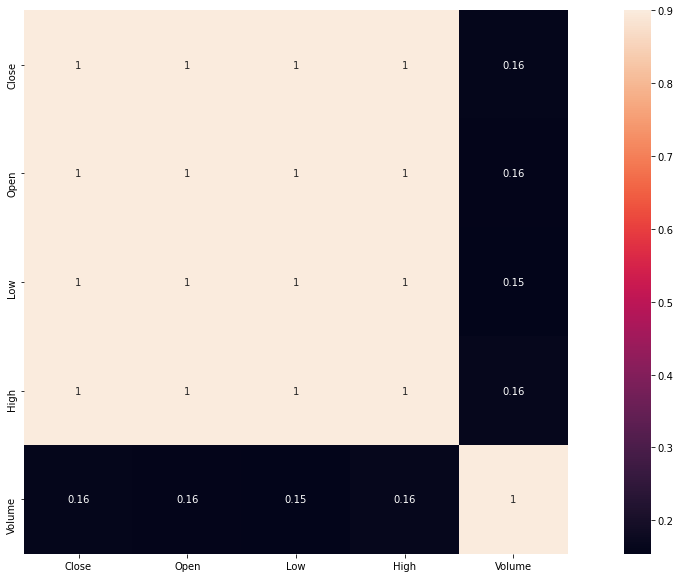

In [16]:
corrmat = aa.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True, annot = True)

### Correlation with Close 

<AxesSubplot:title={'center':'Correlation of Close'}>

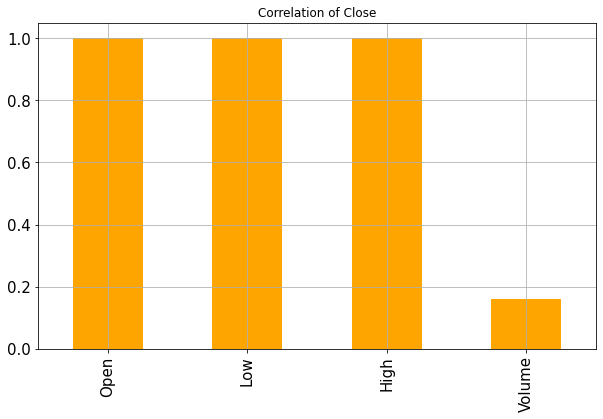

In [17]:
a = aa.drop(columns=['Close'], axis=1)
a.corrwith(aa['Close']).plot.bar(
                figsize = (10, 6), title = "Correlation of Close", fontsize = 15,
                rot = 90, grid = True, color='orange')

### Spliting date into day, month and year

In [18]:
data['date'] = data.index
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day
data['Year'] = data['date'].dt.year

### Close price with respect to year 

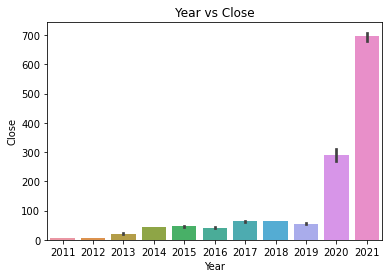

In [19]:
sns.barplot(x='Year', y='Close', data=data).set(title='Year vs Close')
plt.show()

### Close price with respect to Month 

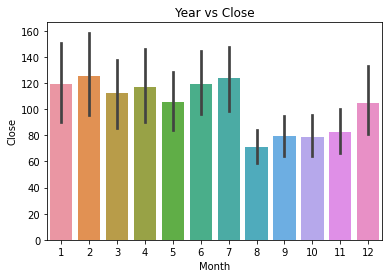

In [20]:
sns.barplot(x='Month', y='Close', data=data).set(title='Year vs Close')
plt.show()

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

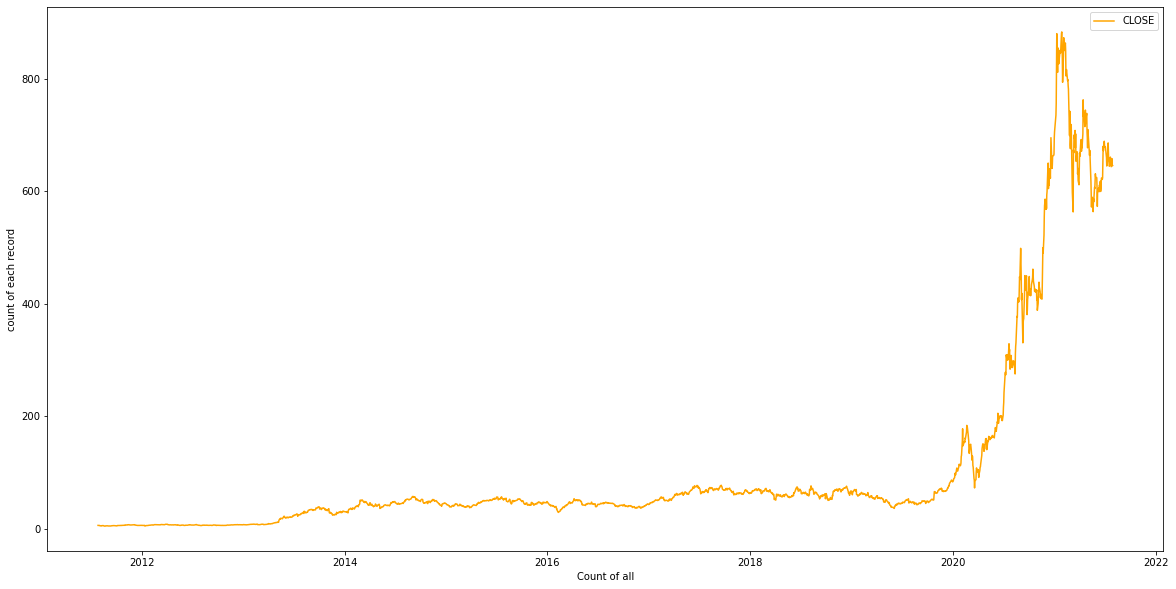

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data.index, data['Close'].values,color='orange',label='CLOSE')
plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

# ------------------------------------------------------------------------------------------------------

# Data Preparation

# ------------------------------------------------------------------------------------------------------

### stochastic features 

In [22]:
def stochastic(df, k, d):
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean()
    return df

stochs = stochastic(data, k=14, d=3)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic'))
fig.show()

### EMA, MACD, MACD single features 

In [23]:

EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
MACD = pd.Series(EMA_12 - EMA_26)
data['MACD']=pd.Series(EMA_12 - EMA_26)
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean())
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)
fig.show()

<AxesSubplot:xlabel='Date'>

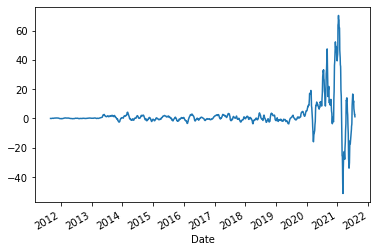

In [24]:
data['MACD'].plot()

### Moving average features

In [25]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift()
data['EMA_200'] =data['Close'].ewm(200).mean().shift()
data['MA_50'] = data['Close'].rolling(50).mean()
data['MA_200'] = data['Close'].rolling(200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200'))
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200'))

fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

### Relative Strength Index RSI 7 and 14 features

In [27]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi


data['RSI 7'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7']))
fig.show()

In [28]:
data['RSI 14'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 14']))
fig.show()

### Bollinger bands features

In [29]:
def bbands(price, length=30, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

data['BB_Middle_Band'], data['BB_Upper_Band'], data['BB_Lower_Band'] = bbands(data['Close'], length=20, numsd=1)

In [30]:
fig = go.Figure(go.Scatter(x=data.index, y=data['BB_Middle_Band']))
fig.show()

### Calculation of Aroon Oscillator features

In [31]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df.index):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [32]:
listofzeros = [0] * 25
up, down = aroon(data)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * data.shape[0]
    data['Aroon_Oscillator'] = aroon_list
else:
    data['Aroon_Oscillator'] = listofzeros+aroon_list

In [33]:
fig = go.Figure(go.Scatter(x=data.index, y=data['Aroon_Oscillator']))
fig.show()

### Average Directional Index features

In [34]:
data['ATR'] = data['Close'].rolling(window=14).mean()
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
DMI(data, 14)

In [35]:
fig = go.Figure(go.Scatter(x=data.index, y=data['ADX']))
fig.show()

In [36]:
data.to_csv('TSLA_Stock.csv', index=False)